# Association Rules Apriori

Considering the set of data from the adult_income.xlsx file. This dataset refers to the 1994 US Census database. 

Based on the “Adult Income Dataset” from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/adult

Tasks:
- Explore possible association rules by the Apriori algorithm.

- Select and comment on some rules that you consider most relevant, taking into account the respective values ​​of support, confidence and lift

Note:
- When using a ‘wide’ dataset to create a transaction object, all variables must either be logical or factor. Therefore, it is recommended to:
> Discretize all numerical variables (eg. age).
> 
> Discretization can be carried with the function discretize() from package arules.
- Factorize all categorical or text variables. Factorization can be carried with function factor from R base.
- Set argument format = "wide" (default) when generating a transactions object. Argument cols is not needed for this format

## Load libraries

In [11]:
library(arules)
library(openxlsx)
library(dplyr)
library(httr)
library(readxl)

## Load dataset

In [2]:
# xlsx file URL on GitHub
url <- "https://github.com/E-man85/ML-R/blob/main/03-data/adult_income.xlsx?raw=true" 
# Download the file
GET(url, write_disk(temp <- tempfile(fileext = ".xlsx")))
# Read the xlsx file
data <- read_excel(temp)
adult_income <-read.xlsx(temp)

Response [https://raw.githubusercontent.com/E-man85/ML-R/main/03-data/adult_income.xlsx]
  Date: 2023-08-01 16:07
  Status: 200
  Content-Type: application/octet-stream
  Size: 2.03 MB
<ON DISK>  C:\Users\Egomes\AppData\Local\Temp\Rtmpw5yGPz\file54b45e24a23.xlsxNULL

## Explore data

In [3]:
str(adult_income)
head(adult_income)

'data.frame':	48842 obs. of  10 variables:
 $ age           : num  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass     : chr  "Private" "Private" "Local-gov" "Private" ...
 $ education     : chr  "11th" "HS-grad" "Assoc-acdm" "Some-college" ...
 $ marital.status: chr  "Never-married" "Married-civ-spouse" "Married-civ-spouse" "Married-civ-spouse" ...
 $ occupation    : chr  "Machine-op-inspct" "Farming-fishing" "Protective-serv" "Machine-op-inspct" ...
 $ relationship  : chr  "Own-child" "Husband" "Husband" "Husband" ...
 $ race          : chr  "Black" "White" "White" "Black" ...
 $ gender        : chr  "Male" "Male" "Male" "Male" ...
 $ native.country: chr  "United-States" "United-States" "United-States" "United-States" ...
 $ income        : chr  "&lt;=50K" "&lt;=50K" "&gt;50K" "&gt;50K" ...


,age,workclass,education,marital.status,occupation,relationship,race,gender,native.country,income
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,&lt;=50K
2,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,&lt;=50K
3,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,&gt;50K
4,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,&gt;50K
5,18,NA,Some-college,Never-married,NA,Own-child,White,Female,United-States,&lt;=50K
6,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,&lt;=50K


This dataset is presented in ‘wide’ format

## Data Preparation

In [4]:
# Discretize all numerical variables age
adult_income <- adult_income %>% mutate(age=  discretize(adult_income$age, method ='frequency', breaks = 5))
# Factorize all categorical or text variables
adult_income <- adult_income %>% mutate_if(is.character, as.factor)
# Check Variables
str(adult_income)

'data.frame':	48842 obs. of  10 variables:
 $ age           : Factor w/ 5 levels "[17,26)","[26,33)",..: 1 3 2 4 1 3 2 5 1 5 ...
  ..- attr(*, "discretized:breaks")= num [1:6] 17 26 33 41 51 90
  ..- attr(*, "discretized:method")= chr "frequency"
 $ workclass     : Factor w/ 8 levels "Federal-gov",..: 4 4 2 4 NA 4 NA 6 4 4 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 2 12 8 16 16 1 12 15 16 6 ...
 $ marital.status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 3 3 5 5 5 3 5 3 ...
 $ occupation    : Factor w/ 14 levels "Adm-clerical",..: 7 5 11 7 NA 8 NA 10 8 3 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 4 1 1 1 4 2 5 1 5 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 3 5 5 3 5 5 3 5 5 5 ...
 $ gender        : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 2 1 2 ...
 $ native.country: Factor w/ 41 levels "Cambodia","Canada",..: 39 39 39 39 39 39 39 39 39 39 ...
 $ income        : Factor w/ 2 levels "&gt;50K

## Create transactions matrix containing all transaction

In [5]:
transactions <- transactions(adult_income,
                             format = 'wide')
transactions
summary(transactions)

transactions in sparse format with
 48842 transactions (rows) and
 106 items (columns)

transactions as itemMatrix in sparse format with
 48842 rows (elements/itemsets/transactions) and
 106 columns (items) and a density of 0.09309089 

most frequent items:
native.country=United-States                   race=White 
                       43832                        41762 
             income=&lt;=50K            workclass=Private 
                       37155                        33906 
                 gender=Male                      (Other) 
                       32650                       292650 

element (itemset/transaction) length distribution:
sizes
    7     8     9    10 
   46  2753   821 45222 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.000  10.000  10.000   9.868  10.000  10.000 

includes extended item information - examples:
       labels variables  levels
1 age=[17,26)       age [17,26)
2 age=[26,33)       age [26,33)
3 age=[33,41)       age [33,41)

includes extended transaction information - examples:
  transactionID
1             1
2     

## Plot the most frequent values in a barplot

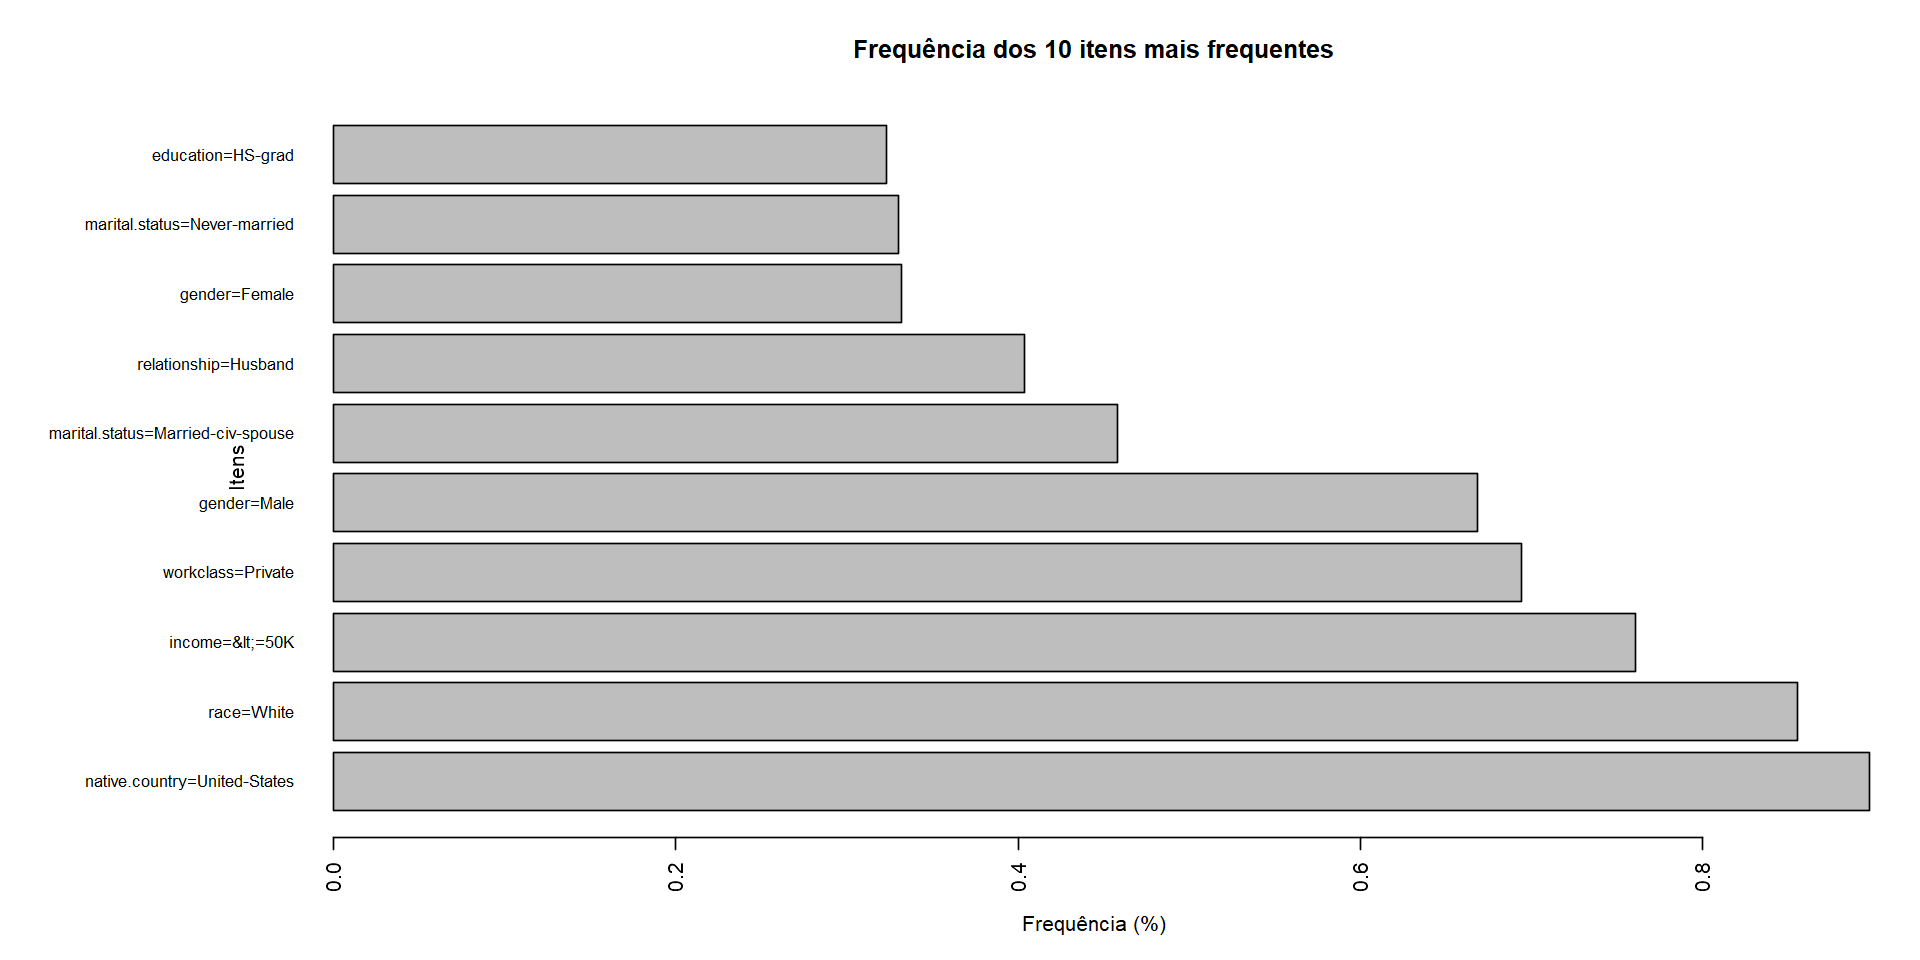

In [6]:
options(repr.plot.width=16, repr.plot.height=8)
itemFrequencyPlot(transactions, 
                  topN = 10,
                  horiz = TRUE,
                  cex.names = 0.8,
                  main = "Frequência dos 10 itens mais frequentes",
                  xlab = "Frequência (%)",
                  ylab = "Itens")

## Mining Associations with the Apriori Algorithm

In [7]:
rules_90_conf <- apriori(data= transactions,
                   parameter = list(supp = 0.5, #rules that occur in at least 50% of the transactions
                                    conf = 0.9, #have a confidence of at least 90%
                                    minlen= 2 #minimum length of values
                                    ))
summary(rules_90_conf)                                   

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24421 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[106 item(s), 48842 transaction(s)] done [0.02s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [5 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 5 rules

rule length distribution (lhs + rhs):sizes
2 3 
1 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     3.0     3.0     2.8     3.0     3.0 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.5415   Min.   :0.9051   Min.   :0.5883   Min.   :1.019  
 1st Qu.:0.5415   1st Qu.:0.9144   1st Qu.:0.5942   1st Qu.:1.019  
 Median :0.5434   Median :0.9148   Median :0.5983   Median :1.026  
 Mean   :0.5996   Mean   :0.9153   Mean   :0.6548   Mean   :1.030  
 3rd Qu.:0.5835   3rd Qu.:0.9205   3rd Qu.:0.6379   3rd Qu.:1.027  
 Max.   :0.7881   Max.   :0.9217   Max.   :0.8550   Max.   :1.059  
     count      
 Min.   :26450  
 1st Qu.:26450  
 Median :26540  
 Mean   :29287  
 3rd Qu.:28501  
 Max.   :38493  

mining info:
         data ntransactions support confidence
 transactions         48842     0.5        0.9
                                                                               call
 apriori(data =

## Sort rules by descending metric of interest, and inspect the top n few.

In [8]:
#Inspect the 5 roles with 90% conf
options(digits=4)
inspect(rules_90_conf[1:5])

    lhs                               rhs                            support confidence coverage  lift count
[1] {race=White}                   => {native.country=United-States}  0.7881     0.9217   0.8550 1.027 38493
[2] {race=White,                                                                                            
     gender=Male}                  => {native.country=United-States}  0.5415     0.9205   0.5883 1.026 26450
[3] {gender=Male,                                                                                           
     native.country=United-States} => {race=White}                    0.5415     0.9051   0.5983 1.059 26450
[4] {workclass=Private,                                                                                     
     race=White}                   => {native.country=United-States}  0.5434     0.9144   0.5942 1.019 26540
[5] {race=White,                                                                                            
     income=&lt;=50

With 90% confidence, the algorithm generated 5 association rules with a minimum of 2 values, 1 has length 2 (1 antecedent and 1 consequent) and 4 have length 3 (2 antecedents and 1 consequent).

In the first rule {race=White} =>{native.country=United-States}, 78.81% (support) of transactions appear.

Confidence 92.17% which means that when {race=White} occurs in a {native.country=United-States} transaction.

Proportion of transactions that contain the antecedent(converge) means that {race=White} occurs in about 85.50% of transactions.

Lift of 1027, which means that the occurrence of {race=White} increases the probability of {native.country=United-States} by 1.027 times.

In [9]:
rules_60_conf <- apriori(transactions,
                   parameter = list(supp = 0.5, #rules that occur in at least 50% of the transactions
                                    conf = 0.6, #have a confidence of at least 60%
                                    minlen= 2 #minimum length of values
                                    ))
summary(rules_60_conf) 
#Inspect the 25 roles with 60% conf
rules_60_conf <- sort(rules_60_conf, by = 'lift', decresing = TRUE)
inspect(rules_60_conf)                                   

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24421 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[106 item(s), 48842 transaction(s)] done [0.03s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [25 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 25 rules

rule length distribution (lhs + rhs):sizes
 2  3 
16  9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    2.00    2.36    3.00    3.00 

summary of quality measures:
    support        confidence       coverage          lift      
 Min.   :0.541   Min.   :0.667   Min.   :0.588   Min.   :0.973  
 1st Qu.:0.543   1st Qu.:0.714   1st Qu.:0.668   1st Qu.:0.994  
 Median :0.588   Median :0.856   Median :0.761   Median :1.006  
 Mean   :0.604   Mean   :0.812   Mean   :0.752   Mean   :1.010  
 3rd Qu.:0.617   3rd Qu.:0.892   3rd Qu.:0.855   3rd Qu.:1.028  
 Max.   :0.788   Max.   :0.922   Max.   :0.897   Max.   :1.059  
     count      
 Min.   :26450  
 1st Qu.:26540  
 Median :28735  
 Mean   :29493  
 3rd Qu.:30145  
 Max.   :38493  

mining info:
         data ntransactions support confidence
 transactions         48842     0.5        0.6
                                                                               call
 apriori(data = transactions, p

     lhs                                rhs                            support confidence coverage   lift count
[1]  {gender=Male,                                                                                             
      native.country=United-States}  => {race=White}                    0.5415     0.9051   0.5983 1.0586 26450
[2]  {workclass=Private,                                                                                       
      native.country=United-States}  => {race=White}                    0.5434     0.8804   0.6172 1.0297 26540
[3]  {gender=Male}                   => {race=White}                    0.5883     0.8801   0.6685 1.0293 28735
[4]  {race=White}                    => {gender=Male}                   0.5883     0.6881   0.8550 1.0293 28735
[5]  {workclass=Private}             => {income=&lt;=50K}               0.5430     0.7821   0.6942 1.0282 26519
[6]  {income=&lt;=50K}               => {workclass=Private}             0.5430     0.7137   0.7607 1.028

Setting the confidence to 60%, the algorithm generated 25 association rules with a minimum of 2 values, 16 have length 2 and 9 have length 3

In [10]:
inspect(rules_60_conf[6])

    lhs                  rhs                 support confidence coverage lift 
[1] {income=&lt;=50K} => {workclass=Private} 0.543   0.7137     0.7607   1.028
    count
[1] 26519


Analyzing rule 6:

Support- 54.3% of registrations have the condition {income=<=50K} => {workclass=Private}.

A confidence - if the antecedent is true {income=<=50K} , the probability of the person working in a private company is 71.37%.

A converges - applies to 76.07% of records.

The lift is 1.028, which indicates that the person is 1.028 times more likely to work in a private company when the antecedent condition is true.

We can say that whenever a person's income is {income=<=50K} then they are likely to work {workclass=Private}.